In [6]:
#The point of this project is to create the most effective plague

In [7]:
#We added factors such as government intervention to make the model as realistic as possible

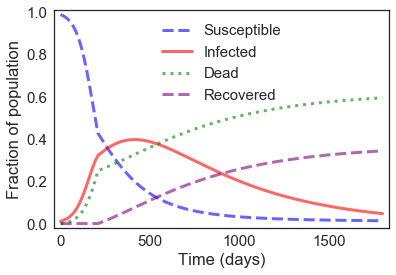

In [2]:

%matplotlib inline

from modsim import *

init = State(S=89, IU=1, IS=0, R=0, RE=0) #IU = Infected unknown, IS = Infectious, RE = Recovered
#convert values to percentages
init /= sum(init)
beta = 1/30 #Contact rate
gamma = 1/100 #Death rate

#"Death rates" for each disease
gammaCold = 1/10
gammaVari = 1/8.5
gammaMeas = 1/8

#Incubation periods turned into rates
incCold = 1/1.5
incVari = 1/15
incMeas = 1/12

recov=0 #Recovery rate

def make_system(beta, gamma, inc, recov):
    '''
    beta is contact rate
    gamma is death rate
    '''
    init = State(S=89, IU=0, IS=1, R=0, RE=0)
    init /= sum(init)

    t0 = 0
    #
    t_end = 5*360

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, inc=inc, recov=recov)


system = make_system(beta, gamma, incCold, recov)

def update(state, system):
    '''
    s - susceptible
    iU - infected, unknown
    iS - infectious
    r - dead
    re - recovered
    '''
    s, iU, iS, r, re = state #s, i, r, inc, re = state
    newlyInfected = system.beta * iS * s
    newlyInfectious = iU*system.inc   
    dead = system.gamma * iS
    recovered = system.recov * iS
    
    s += -newlyInfected
    iU += newlyInfected - newlyInfectious
    iS += - dead - recovered + newlyInfectious
    r += dead
    re+= recovered
    
    #if more than x% of the population is dead, the government will intervene
    if(r>.25):
        system.beta=1/100
        system.gamma= 1/1000
        system.recov=1/1000
    
    return State(S=s, IU=iU, IS=iS, R=r, RE = re)


state = update(init, system)

def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add three Series objects to the System: S, I, R
    
    system: System object
    update_func: function that updates state
    """
    S = TimeSeries()
    IU = TimeSeries()
    IS = TimeSeries()
    R = TimeSeries()
    RE=TimeSeries()
    
    state = system.init
    t0 = system.t0
    S[t0], IU[t0], IS[t0], R[t0], RE[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], IU[t+1], IS[t+1], R[t+1], RE[t+1] = state
    
    system.S = S
    system.IU = IU
    system.IS = IS  
    system.R = R
    system.RE=RE
    
#plots the amount of susceptible, infected, dead, and recovered   
def plot_results(S, I, R, RE):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Dead')
    plot(RE, 'r--', color='purple', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')
    
newfig()

run_simulation(system, update)
plot_results(system.S, (system.IS+system.IU), system.R, system.RE)